In [66]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import stochastic_plots as stoch
import examen_ordinaria_PE_2020_2021_plantilla_corregido as pe
from arrival_process_simulation import *
import BM_simulators as bm
from exercises import *
# Author: <alberto.suarez@uam.es>


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 1: Simulation of a Continuous-time Markov Chain

## Continuous-time Markov Chain

In [35]:
# Transition matrix of the jump process

P = np.array([[0. , 1. , 0. ],
              [0. , 0. , 1. ],
              [0.5, 0.5, 0. ]])


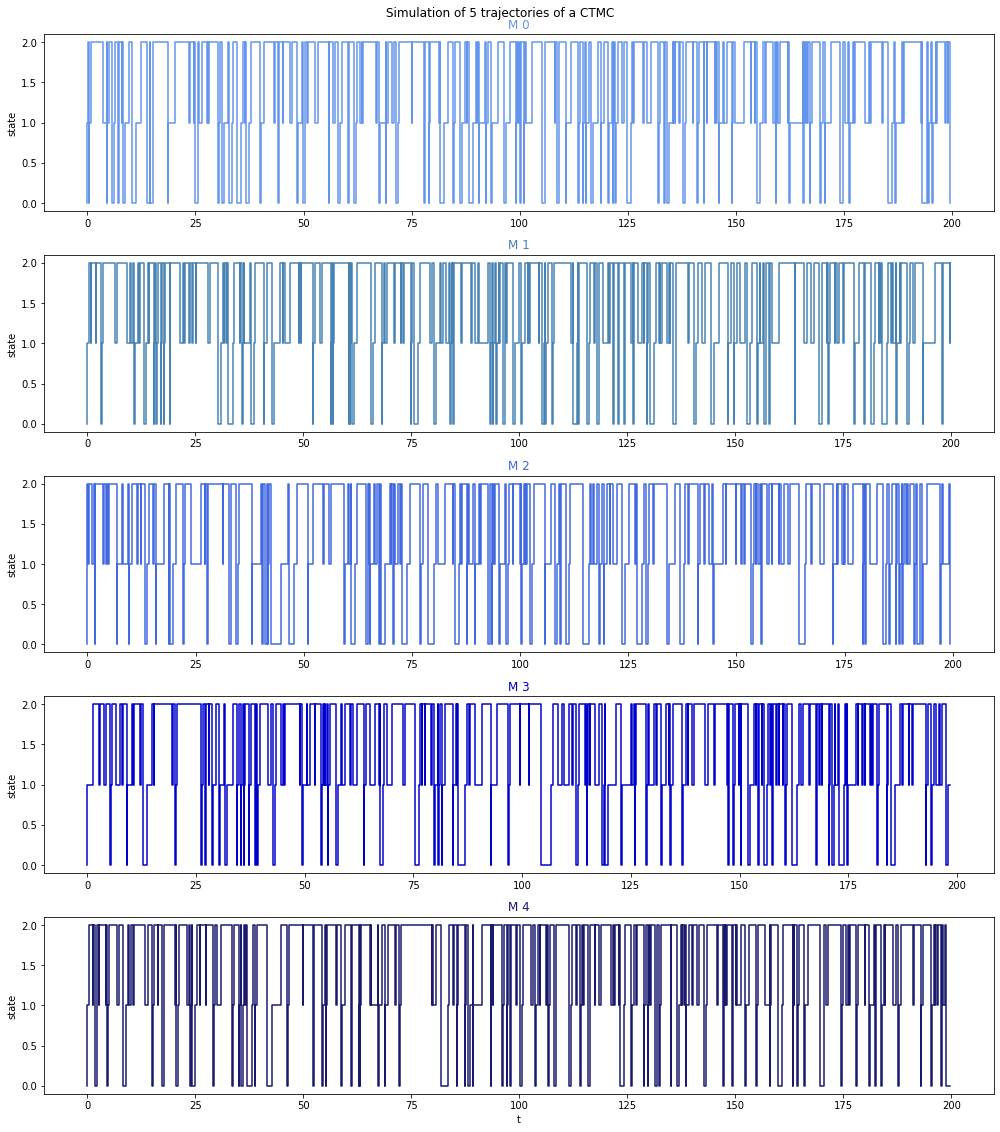

In [79]:
# Simulation of a few trajectories

lambda_rate1, lambda_rate2, lambda_rate3 = 2., 1., 3.
lambda_rates = [lambda_rate1, lambda_rate2, lambda_rate3]

T, M = 5, 5
t0, t1 = 0., 200.

arrival_times_CTMC, trajectories_CTMC = pe.simulate_continuous_time_Markov_Chain(P, lambda_rates, 0, M, t0, t1)

fig, ax = plt.subplots(M, 1, figsize=(14, 16))
plt.suptitle(f'Simulation of {M} trajectories of a CTMC')
plt.xlabel('t')
colors=['cornflowerblue', 'steelblue', 'royalblue', 'mediumblue', 'midnightblue']

for m, c in enumerate(colors):
    ax[m].set_title('M {}'.format(m), color=c)
    ax[m].set_ylabel('state')
    ax[m].step(arrival_times_CTMC[m], trajectories_CTMC[m], c)

fig.tight_layout()

In [84]:
# Stationary distribution of the jump process from a single trajectory
_, total = np.unique(trajectories_CTMC[0], return_counts=True)
total = total/np.sum(total)
print(total)

[0.22255193 0.38872404 0.38872404]


In [4]:
# Stationary distribution of the CTMC from a single trajectory

In [5]:
# Stationary distribution of the CTMC from the final state in a sample of M trajectories


## Exercise 2: Simulation of a Brownian bridge process

### Expected value of the standard Wiener process

Consider the expression for the standard Brownian bridge
$$ 
BB_{std}(t) = W(t) - W(1) \, t 
$$

The mean of this process is
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = \mathbb{E}\left[ W(t) - W(1) \, t \right]
$$
The expected value operator is linear. Therefore, 
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = \mathbb{E}\left[ W(t) \right] - \mathbb{E}\left[ W(1) \right] t.
$$
Since process $W(t)$ has zero mean $\mathbb{E}\left[ W(t) \right] = 0, \ \forall t \ge 0$
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = 0, \quad \forall t \in \left[0, 1 \right].
$$

### Covariance function for the standard Brownian bridge

The covariance function for the standard Brownian bridge is defined as
$$ 
\gamma(t,s) = 
 \mathbb{E} \left[\left(BB_{std}(s) - \mathbb{E}\left[ BB_{std}(s) \right] \right)  \left(BB_{std}(t) \right] - \mathbb{E}\left[ BB_{std}(t) \right] \right). 
$$ 
Using 
$$ 
BB_{std}(t) = W(t) - W(1) \, t, \quad \mathbb{E}\left[ BB_{std}(t) \right] = 0
,$$ 
and 
$$
\gamma(s, t) = 
 \mathbb{E} \left[ \left(W(s) - W(1) \, s \right) \left(W(t) - W(1) \,  t \right)\right] =
 \mathbb{E} \left[ W(s) W(t) \right]  + \mathbb{E} \left[W^2(1)\right] s t - \mathbb{E} \left[W(1) W(t)\right] \, s 
- \mathbb{E} \left[W(s) W(1) \right]  \, t. 
$$ 
Finally, taking into account that
$$ 
\mathbb{E}\left[ W(s) W(t) \right] = \min(s, t), $$ 
one gets 
$$ 
\gamma(s, t) =  \min(s, t) + s t - t s - s t = \min(s, t) - s t. 
$$ 


### Mean function for a general Brownian bridge

### Covariance function for a general Brownian bridge

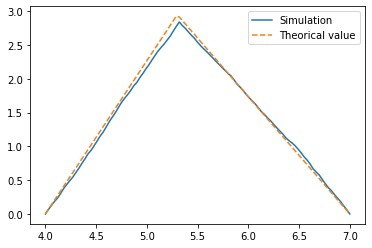

In [33]:
## Brownian bridge simulation

t0, t1 = 4., 7.
B0, B1 = 1., 3.
M, N = 5000, 100
sigma = 2.
t_ref =  5.3

ts, BB = bm.simulate_Brownian_bridge(t0, B0, t1, B1, sigma, M, N)

ts_ref = np.where(ts >= t_ref)[0][0]

covar = [np.mean((BB[:,t] - np.mean(BB[:,t])) * (BB[:,ts_ref] - np.mean(BB[:,ts_ref]))) for t in range(len(ts))]

def theoretical_cov(t, s, sigma, t1, t0):
    return sigma**2 * (np.minimum(t-t0, s-t0) - ((s-t0)*(t-t0))/(t1-t0))

plt.plot(ts, covar, label="Simulation")
plt.plot(ts, theoretical_cov(ts, t_ref, sigma, t1, t0), "--", label="Theorical value")

plt.legend()
plt.show()


# Exercise 3: Simulation of a stochastic volatility model

### Derivation of $\mathbb{E}\left[\sigma(t)\right]$

Consider the Ito SDE
$$
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$$
where $\alpha > 0$ is the reversion rate, $\xi > 0$ is the volatility of the stochastic process $\sigma(t)$. 

Define the process $X(t) = \sigma(t) - \sigma_{\infty}$. Since $ \sigma_{\infty} $ is constant, $dX(t) = d \sigma(t)$, and the equation becomes
$$
d X(t) = - \alpha X(t) dt + \xi dW(t).
$$


Let's take the expected value on both sizes of the equation 
$$
\mathbb{E}\left[dX(t) \right] = \mathbb{E}\left[ - \alpha  X(t) dt + \xi  dW(t) \right].
$$

Using the fact that the expected value is a linear operator, we get
$$
d\mathbb{E} \left[X(t) \right] = - \alpha \mathbb{E}\left[ X(t) \right] dt + \xi \mathbb{E}\left[ dW(t) \right].
$$
Since the Wiener process has zero mean, the equation becomes 
$$
d \mathbb{E} \left[ X(t) \right] = - \alpha  \mathbb{E} \left[ X(t) \right] dt.
$$
Using the method of separation of variables
$$
\frac{1}{ \mathbb{E} \left[ X(t) \right]} d \mathbb{E} \left[ X(t) \right] = - \alpha dt,
$$
the equation can be integrated between $(t_0, X_0)$, where $X_0 = \sigma_0 - \sigma_{\infty}$, and $\left(t,  \mathbb{E} \left[ X(t) \right] \right)$
$$
\int_{X_0}^{\mathbb{E} \left[ X(t) \right]} \frac{1}{ \mathbb{E} \left[ X \right]} d \mathbb{E} \left[ X \right]  = - \alpha \int_{t_0}^t d\tau. 
$$
The solution is
$$
\log \frac{ \mathbb{E}\left[X(t) \right] }{ X_0 } = - \alpha \left(t- t_0 \right).
$$
After some straightforward algebraic manipulation, one obtains
$$
\mathbb{E} \left[ X(t) \right] =  X_0  e^{- \alpha \left(t- t_0 \right)}.
$$
Undoing the change of variable, we obtain
$$
\mathbb{E} \left[ \sigma(t) \right] = \sigma_{\infty} + \left(\sigma_0  - \sigma_{\infty} \right)  e^{- \alpha \left(t- t_0 \right)}.
$$

### Derivation of $\text{Var}\left[\sigma(t)\right]$

### Derivation of the conditional pdf:  $\text{pdf}\left[\left.  t, \sigma(t) \right| t_0, \sigma_0 \right]$

### Simulation of the SDE $
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$


In [7]:
# Simulation of a sample of trajectories

In [8]:
# Mean and stdev of the trajectories simulated           
                              

In [9]:
# Asymptotic stationary pdf of the process

# Exercise 4: Pricing of a European call option

## Pricing by quadrature

In [10]:
# Parameters that characterize underlying 
S0 = 100.0
sigma = 0.3

# Parameters of the EU call option
K = 90.0
T = 2.0

# Risk-free interest rate
r = 0.05

price_EU_call = pe.price_EU_call(S0, K, r, sigma, T)

print('Price = {:.4f}'.format(price_EU_call))

Price = 26.2402


## Monte Carlo pricing of a European call option